In [91]:
import numpy as np
from matplotlib import pyplot as plt
import os

from tensorflow import keras

from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras.utils import to_categorical


from PIL import Image
# from tensorflow.keras.preprocessing import image

In [92]:
# Read images and convert to np.array make lists. 
#Images (image_array_list) for later X and the name of obj (image_value_list) for y.  

image_array_list = []
image_value_list = []
num_obj = []

objects = ['suncream','adapter','thermometer','onion','lime','teabag','almonds','fork','apple','banana']

# ------------------------------

for ob_idx, ob in enumerate(objects):
    path = "data/"+ob

    obj_name_list = os.listdir(path)
    for p_idx,p in enumerate(obj_name_list):

        im = keras.preprocessing.image.load_img(path+"/"+p, target_size = (224, 224))

        image_array_list.append(np.array(im))
        image_value_list.append(ob_idx)

    print(f'{ob}   {p_idx}')
    num_obj.append(p_idx)



suncream   26
adapter   38
thermometer   38
onion   20
lime   21
teabag   17
almonds   18
fork   683
apple   546
banana   479


size of image array: (1896, 224, 224, 3)


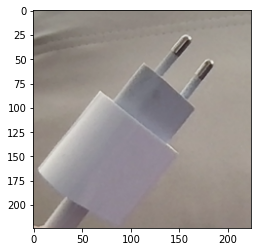

In [93]:
X= np.array(image_array_list)
y= np.array(image_value_list)
print(f'size of image array: {X.shape}')
plt.imshow(X[45]) 


In [94]:
# Shuffling the images for a better training 
def shuffel_arrays(arr1, arr2):
    assert len(arr1) == len(arr2)
    p = np.random.permutation(len(arr1))
    return arr1[p], arr2[p]

X_sh,y_sh = shuffel_arrays(X,y)
X = X_sh
y = y_sh

In [95]:
from tensorflow.keras.utils import to_categorical
ycat = to_categorical(y)
ycat[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [96]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, ycat, test_size=0.3, random_state=42)

In [97]:
print(f'Shape of total X: {X.shape}, and y: {ycat.shape}')
print('---------------')
print('After categorization and split: ') 
print(f'Shape of train X: {Xtrain.shape}, and y: {ytrain.shape}')
print(f'Shape of test X: {Xtest.shape}, and y: {ytest.shape}')

Shape of total X: (1896, 224, 224, 3), and y: (1896, 10)
---------------
After categorization and split: 
Shape of train X: (1327, 224, 224, 3), and y: (1327, 10)
Shape of test X: (569, 224, 224, 3), and y: (569, 10)


#### Defining the model:
Defining model for feature learning (Conv2D and Maxpooling 2x) 
Then flatten and then Dense layers

In [98]:
K.clear_session()
model = Sequential([

    Conv2D(6, kernel_size=(5,5), strides=(1,1),
           activation='relu', input_shape=Xtrain[0].shape,
           padding='valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    Conv2D(16, kernel_size=(5,5),strides=(1,1),
           activation='relu', padding='valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    Flatten(),
    
    Dense(120, activation='relu'),
    
    Dense(86, activation='relu'),
    
    Dense(len(objects), activation='softmax')
    
])

In [99]:
# Define comile and its parameters
model.compile(optimizer='rmsprop', # type of Gradient Descent 'rmsprop'
              loss='categorical_crossentropy', # multiclass: 'categorical_crossentropy'
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               5

In [101]:
import tensorflow.keras as keras
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', #the thing we are monitoring
    min_delta = 0.00005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience = 3, #number of epochs with no improvement needed for the model to stop
    verbose = 1, #0 is silent, 1 means a message is displayed when something happens
    mode = 'auto'  
)

In [102]:
# Model learning, it will stop when conditions in early stop are fullfilled
model.fit(Xtrain, ytrain, epochs=500, batch_size=150, validation_split = 0.2,callbacks = [early_stop])

Epoch 1/500
8/8 [==============================] - 16s 2s/step - loss: 239.5969 - accuracy: 0.3214 - val_loss: 1.6328 - val_accuracy: 0.6692
Epoch 2/500
8/8 [==============================] - 15s 2s/step - loss: 0.6354 - accuracy: 0.8021 - val_loss: 1.1721 - val_accuracy: 0.7068
Epoch 3/500
8/8 [==============================] - 15s 2s/step - loss: 0.2953 - accuracy: 0.9218 - val_loss: 0.5035 - val_accuracy: 0.8684
Epoch 4/500
8/8 [==============================] - 15s 2s/step - loss: 0.0713 - accuracy: 0.9887 - val_loss: 0.4426 - val_accuracy: 0.8947
Epoch 5/500
8/8 [==============================] - 16s 2s/step - loss: 0.0346 - accuracy: 0.9953 - val_loss: 0.4699 - val_accuracy: 0.9023
Epoch 6/500
8/8 [==============================] - 15s 2s/step - loss: 0.0240 - accuracy: 0.9981 - val_loss: 0.4060 - val_accuracy: 0.9098
Epoch 7/500
8/8 [==============================] - 15s 2s/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.4245 - val_accuracy: 0.9135
Epoch 8/500
8/8 [========

##### Now predicting the test data

In [103]:
ytest_pred = model.predict(Xtest)

18/18 [==============================] - 3s 141ms/step


In [104]:
# Calculating the accuracy of the model for each digit separately

num_Obj=len(objects)
wrong_count_obj = np.zeros((num_Obj,1))
tot_count_obj = np.zeros((num_Obj,1))
test_len = ytest.shape[0]
tot_correct_count = 0

for i in range(ytest.shape[0]):
    b = np.argmax(ytest[i])
    tot_count_obj[b] = tot_count_obj[b]+1
    if(b==np.argmax(ytest_pred[i])):
        tot_correct_count = tot_correct_count +1
    else:
        wrong_count_obj[b] = wrong_count_obj[b]+1
print(f'In test dataset the total number of correct guessess is {tot_correct_count} out of {test_len}')
print(f'score = {round(tot_correct_count/test_len,5)}')
print('----------------')
print('The % of being wrong for each object:\n')
for ob_idx,ob in enumerate(objects):
    print(f'{ob} is guessed wrongly {wrong_count_obj[ob_idx][0]} times out of {tot_count_obj[ob_idx][0]} --> {round(100*wrong_count_obj[ob_idx][0]/tot_count_obj[ob_idx][0])}%')


In test dataset the total number of correct guessess is 533 out of 569
score = 0.93673
----------------
The % of being wrong for each object:

suncream is guessed wrongly 0.0 times out of 8.0 --> 0%
adapter is guessed wrongly 5.0 times out of 11.0 --> 45%
thermometer is guessed wrongly 6.0 times out of 8.0 --> 75%
onion is guessed wrongly 0.0 times out of 5.0 --> 0%
lime is guessed wrongly 0.0 times out of 8.0 --> 0%
teabag is guessed wrongly 0.0 times out of 3.0 --> 0%
almonds is guessed wrongly 0.0 times out of 7.0 --> 0%
fork is guessed wrongly 4.0 times out of 198.0 --> 2%
apple is guessed wrongly 6.0 times out of 168.0 --> 4%
banana is guessed wrongly 15.0 times out of 153.0 --> 10%
